<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_14_Decision_Tree_FraudDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
# Use decision trees to prepare a model on fraud data
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## 1. Introduction:<a class="anchor" id="1"></a>
### What is a Decision Tree?
+ #### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
+ #### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
+ #### The decisions or the test are performed on the basis of features of the given dataset.
+ #### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
+ #### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
+ #### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
+ #### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [ ]:
# Impporting libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
# Importing Data
df = pd.read_csv('/content/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 2. About Dataset<a class="anchor" id="2"></a>
Context\
Data Description :

+ Undergrad : person is under graduated or not
+ Marital.Status : marital status of a person
+ Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
+ Work Experience : Work experience of an individual person
+ Urban : Whether that person belongs to urban area or not

## 3. Data Exploration <a class="anchor" id="3"></a>

In [ ]:
# Checking Null values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
# Checking duplicate values
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


The features are not on the same scale. For example `City.Population` has a mean of `108747.36` while `Work.Experience` has a mean value of `15.55`. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

### 3.2 Feature Engineering<a class="anchor" id="3.2"></a>

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [ ]:
# Renaming columns
df.rename({'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'taxable_income', 'City.Population':'city_pop','Work.Experience':'work_exp','Urban':'urban'}, axis=1, inplace=True)
df.head()

,undergrad,marital_status,taxable_income,city_pop,work_exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
# Converting taxable income <= 30000 as Risky and other are Good
df1 = df.copy()
df1['taxable_category'] = pd.cut(x = df1['taxable_income'], bins=[10002,30000,99620], labels = ['Risky','Good'])
df1.head()

,undergrad,marital_status,taxable_income,city_pop,work_exp,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [ ]:
df1.taxable_category.unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [ ]:
categorical_features = df.describe(include=['object']).columns
categorical_features

Index(['undergrad', 'marital_status', 'urban'], dtype='object')

In [ ]:
numerical_features = df.describe(include=['Int64']).columns
numerical_features

Index(['taxable_income', 'city_pop', 'work_exp'], dtype='object')

## 4. Data Visualization<a class="anchor" id="4"></a>

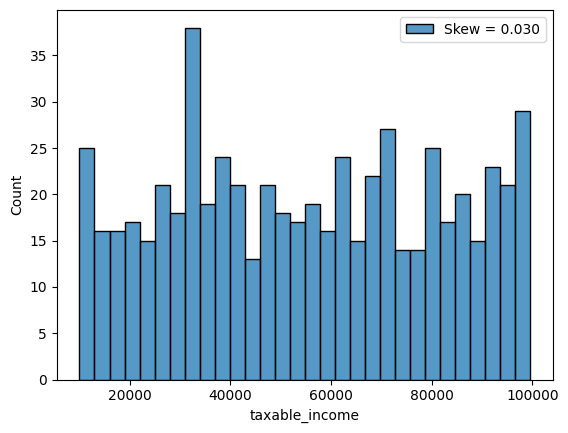

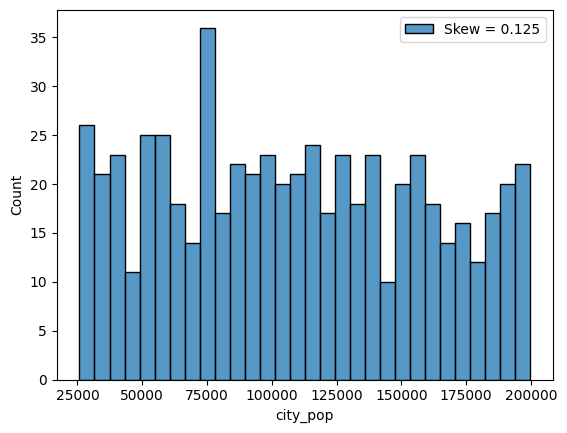

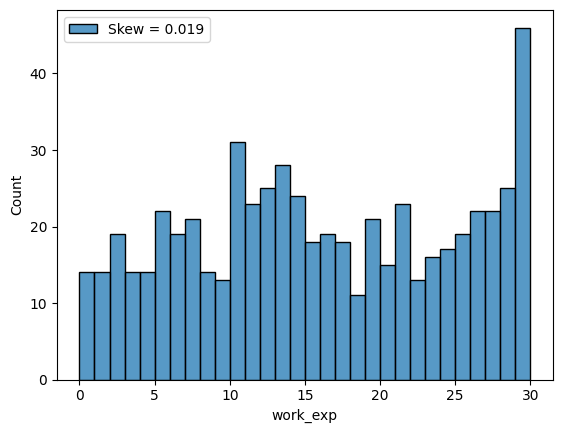

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
for feature in numerical_features:
  skew = df[feature].skew()
  sns.histplot(df[feature], kde=False, label = 'Skew = %.3f'%(skew), bins=30)
  plt.legend(loc='best')
  plt.show()

<Axes: >

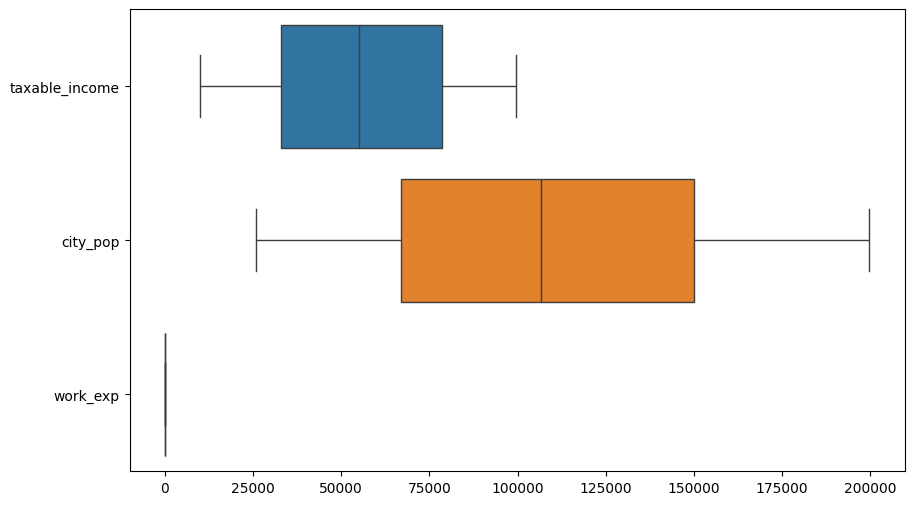

In [ ]:
# Outliers
plt.figure(figsize=(10,6))
sns.boxplot(df, orient='h')

No Outliers detected

<Figure size 800x600 with 0 Axes>

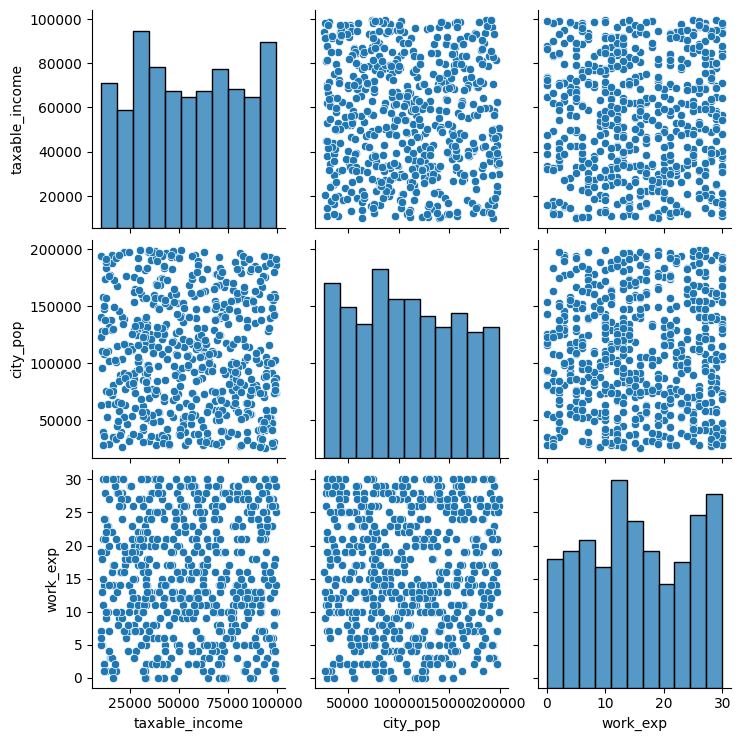

In [ ]:
# Pairplot
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<ipython-input-46-7d4b0f15f932>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis',cbar=False, linewidths=0.5)


<Axes: >

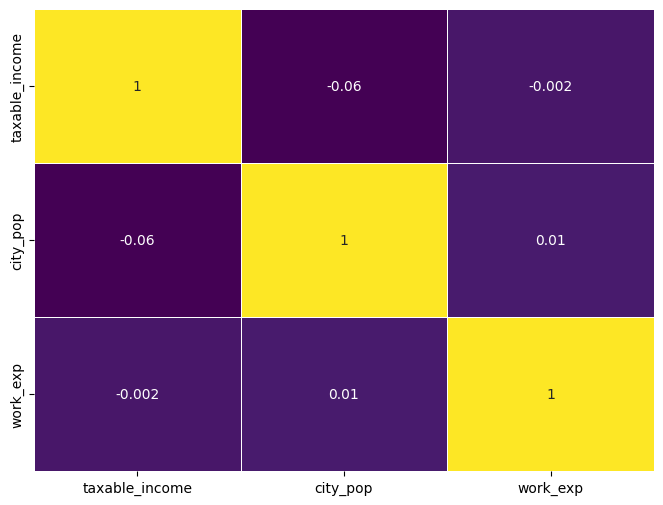

In [ ]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis',cbar=False, linewidths=0.5)

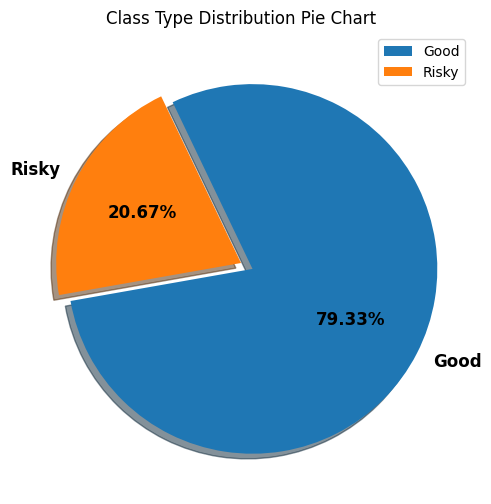

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df1.taxable_category.value_counts(),
        labels=df1.taxable_category.unique(),
        explode = [0.07,0.0],
        shadow=True,
        startangle=190,
        autopct='%.2f%%',
        textprops = {
            'size':'large',
            'rotation':0,
            'color':'black',
            'fontweight':'bold'})

plt.legend(loc='best')
plt.title('Class Type Distribution Pie Chart')
plt.show()


In [ ]:
df1.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

## 5. Data Pre-Processing<a class="anchor" id="5"></a>

In [ ]:
df1.head(1)

,undergrad,marital_status,taxable_income,city_pop,work_exp,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good


In [ ]:
data = df1.copy()
data.drop('taxable_income', axis=1, inplace=True)
categorical_features = data.describe(include=['object','category']).columns
categorical_features

Index(['undergrad', 'marital_status', 'urban', 'taxable_category'], dtype='object')

In [ ]:
# Creating dummy variables of categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
  label_encoder.fit(data[col])
  data[col] = label_encoder.transform(data[col])
data.head()

,undergrad,marital_status,city_pop,work_exp,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


# Train Test Split

In [ ]:
x = data.drop('taxable_category',axis=1)
y = data.taxable_category

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


## 6. When to stop splitting?<a class="anchor" id="6"></a>
You must be asking this question to yourself that when do we stop growing our tree? Usually, real-world datasets have a large number of features, which will result in a large number of splits, which in turn gives a huge tree. Such trees take time to build and can lead to overfitting. That means the tree will give very good accuracy on the training dataset but will give bad accuracy in test data.

There are many ways to tackle this problem through hyperparameter tuning. We can set the maximum depth of our decision tree using the <b>max_depth parameter</b>. The more the value of <b>max_depth</b>, the more complex your tree will be. The training error will off-course decrease if we increase the <b>max_depth</b> value but when our test data comes into the picture, we will get a very bad accuracy. Hence you need a value that will not overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by <b>min_samples_split</b>. Here we specify the minimum number of samples required to do a spilt. For example, we can use a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then using this parameter, we can stop the further splitting of this node and make it a leaf node.

There are more hyperparameters such as :

<b>min_samples_leaf</b> – `represents the minimum number of samples required to be in the leaf node. The more you increase the number, the more is the possibility of overfitting.`

<b>max_features</b> – `it helps us decide what number of features to consider when looking for the best split.`


### Gini Index:
+ Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
+ An attribute with the low Gini index should be preferred as compared to the high Gini index.
+ It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
+ Gini index can be calculated using the below formula:

**`Gini Index= 1- ∑jPj2`**


In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

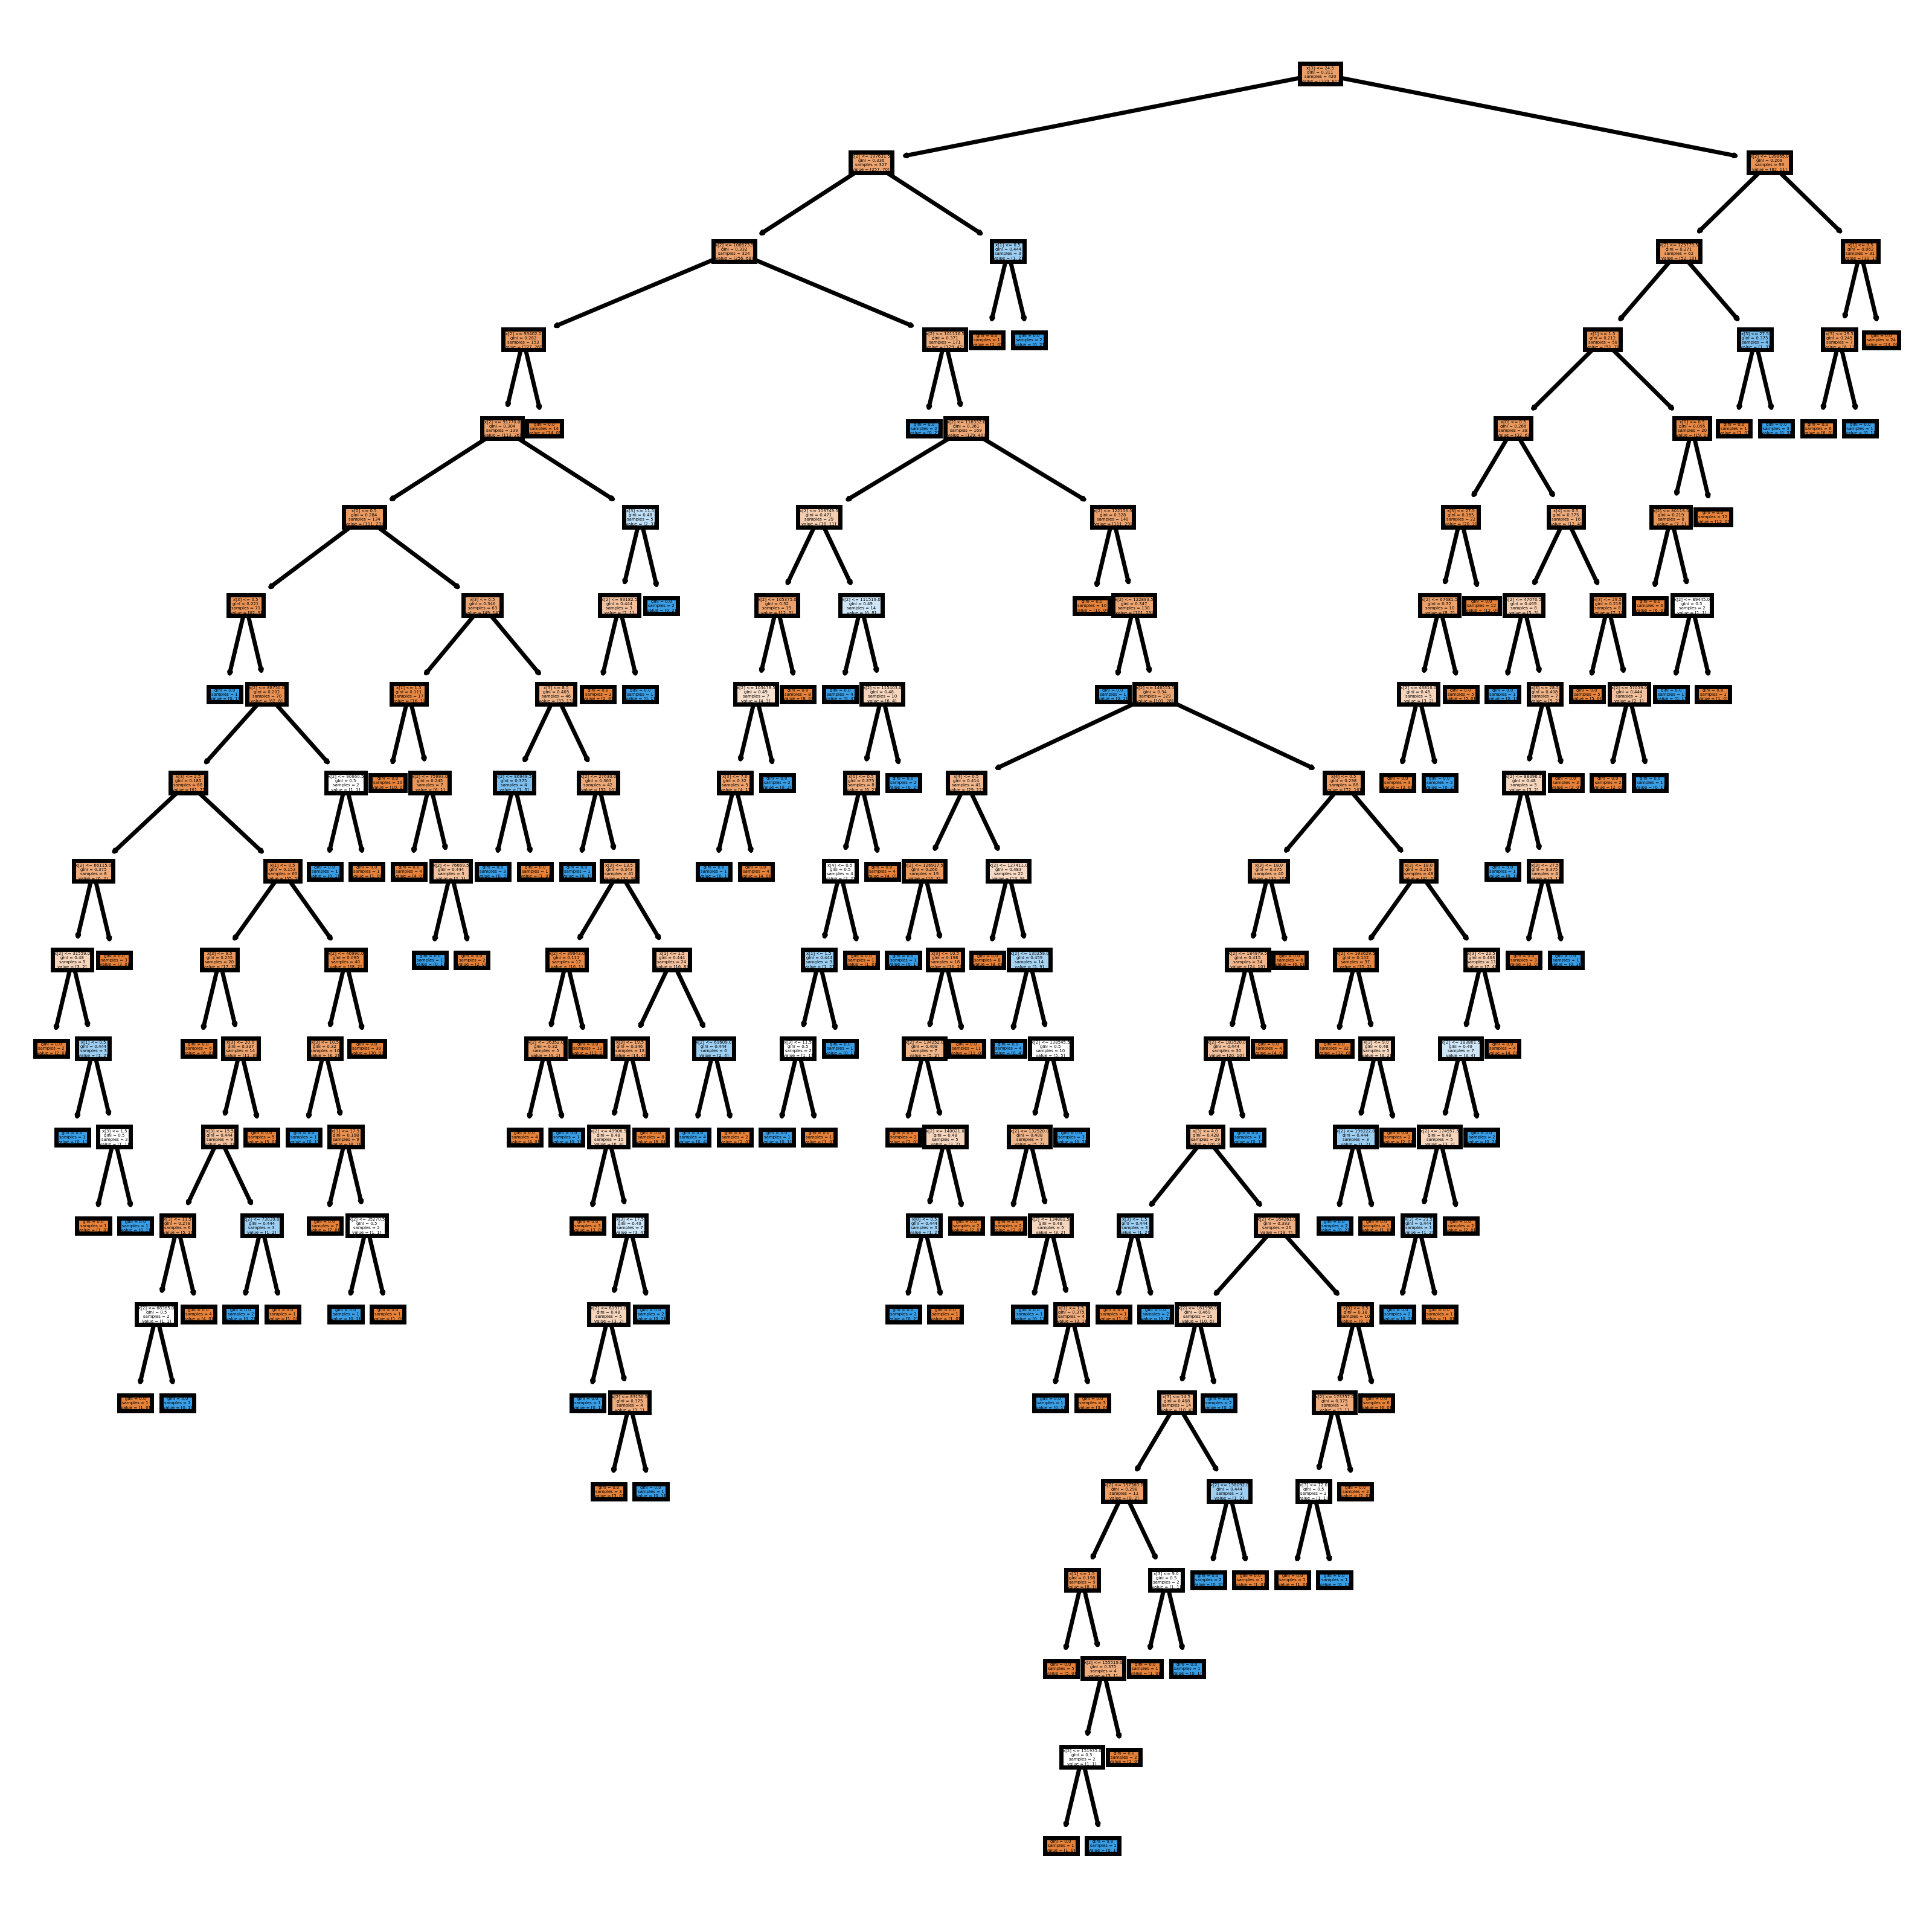

In [ ]:
from sklearn import tree
plt.figure(figsize=(8,8),dpi=500)
tree.plot_tree(model_gini, filled=True)
plt.show

In [ ]:
# Predicting on test data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    138
1     42
dtype: int64

In [ ]:
pd.crosstab(y_test, preds) # getting two way table to compare predicted and actual values

col_0,0,1
taxable_category,,
0,102,35
1,36,7


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.6055555555555555

In [ ]:
# Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       137
           1       0.17      0.16      0.16        43

    accuracy                           0.61       180
   macro avg       0.45      0.45      0.45       180
weighted avg       0.60      0.61      0.60       180



In [ ]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004008822060859483


## 9. Advantages of CART<a class="anchor" id="9"></a>
+ ### Simple to understand, interpret, visualize.
+ ### Decision trees implicitly perform variable screening or feature selection.
+ ### Can handle both numerical and categorical data. Can also handle multi-output problems.
+ ### Decision trees require relatively little effort from users for data preparation.
+ ### Nonlinear relationships between parameters do not affect tree performance
+ ### It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
+ ### It can be very useful for solving decision-related problems.
+ ### It helps to think about all the possible outcomes for a problem.

## 10. Disadvantages of CART<a class="anchor" id="10"></a>
+ ### Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
+ ### Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
+ ### Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
+ ### Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.
+ ### It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
+ ### For more class labels, the computational complexity of the decision tree may increase.